# Analiza dohodkov v metu Kibergraad

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('Kibergrad.csv')

In [6]:
df

,'TIP','CLANOV','OTROK','DOHODEK','CETRT','IZOBRAZBA'
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


In [7]:
df = df.rename(columns={"'TIP'": 'TIP', "'CLANOV'": 'CLANOV', "'OTROK'": 'OTROK', "'DOHODEK'": 'DOHODEK', "'CETRT'": 'CETRT', "'IZOBRAZBA'": 'IZOBRAZBA'})

In [8]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


Iz vsake četrti vzemimo enostaven slučajni vzorec velikosti 100.

In [9]:
filter1 = (df["CETRT"] == 1)
prva_cetrt = df[filter1]

In [10]:
filter2 = (df["CETRT"] == 2)
druga_cetrt = df[filter2]

In [11]:
filter3 = (df["CETRT"] == 3)
tretja_cetrt = df[filter3]

In [12]:
filter4 = (df["CETRT"] == 4)
cetrta_cetrt = df[filter4]

In [13]:
vzorec1 = prva_cetrt.sample(100)
vzorec2 = druga_cetrt.sample(100)
vzorec3 = tretja_cetrt.sample(100)
vzorec4 = cetrta_cetrt.sample(100)

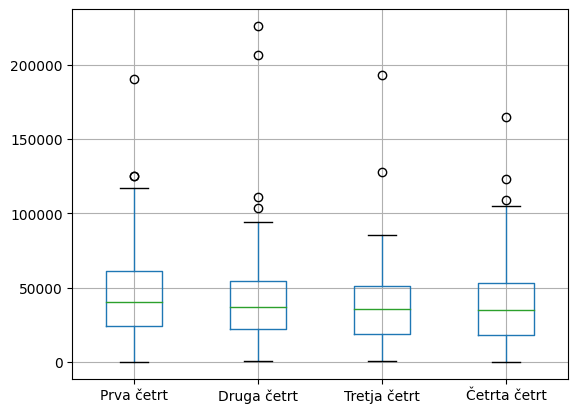

In [15]:
podtabela = pd.DataFrame({"Prva četrt": vzorec1["DOHODEK"].tolist(),
"Druga četrt": vzorec2["DOHODEK"].tolist(),
"Tretja četrt": vzorec3["DOHODEK"].tolist(),
"Četrta četrt": vzorec4["DOHODEK"].tolist()})

graf = podtabela.boxplot(column=["Prva četrt", "Druga četrt", "Tretja četrt", "Četrta četrt"])
plt.show()